![example](images/FoxStudio.webp)

# Microsoft studio needs movie analysis

**Authors:** Yeonjae Zhang, Caleb
***

## Overview

This analysis is made for suggesting mircosoft studio the goals and business directions. With numbers and vote data, I will figure out which movies were successful and recommand business directions from historical data.

## Business Problem
Microsoft is willing to create original video content and they want to do successful business. They have decided to create a new movie studio, but they don't know anything about creating movies. I will give them guide with exploring what types of film are currently doing the best at the box office. I have to translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


## Data Understanding

TheNumbers has the longest running dataset of Numbers for money from the popular movies in world-wide. And TheMovieDB has the largest dataset of the popularity. The data files will provide movie-budgets, gross-income, and vote-average of each of movies.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
numbers_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
vote_df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

In [3]:
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### Numbers_df Data
Numbers_df includes records from Apr 1st, 1975 to Sep 9th, 2016, and includes movie names, production_budgets, domestic_grosses, and worldwide_grosses.

In [5]:
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


I need 'worlwide_gross' / 'production_budget' later. I figured out i need to clean the both columns to 'int'

In [6]:
numbers_df.loc[:, ['production_budget', 'domestic_gross', 'worldwide_gross']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   production_budget  5782 non-null   object
 1   domestic_gross     5782 non-null   object
 2   worldwide_gross    5782 non-null   object
dtypes: object(3)
memory usage: 135.6+ KB


### Vote Data
Vote data includes records from Apr 29th, 1930 to Dec 25th, 2020m and includes title, vote_average, and vote_count. 1930-04-29 

In [7]:
vote_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [8]:
vote_df['vote_average'].describe()

count    26517.000000
mean         5.991281
std          1.852946
min          0.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         10.000000
Name: vote_average, dtype: float64

In [9]:
vote_df['vote_count'].describe()

count    26517.000000
mean       194.224837
std        960.961095
min          1.000000
25%          2.000000
50%          5.000000
75%         28.000000
max      22186.000000
Name: vote_count, dtype: float64

## Data Preparation

For the vote and numbers files, I make them easier to work with by normalizing column names, dropping unnecessary columns, and changing dtype.


### Data Cleaning

#### Numbers_df Data

In [10]:
# Make calculation available
numbers_df[['production_budget', 'worldwide_gross'
           ]] = numbers_df[['production_budget', 'worldwide_gross'
                           ]].replace({'\$' : '', ',' : ''
                                      }, regex = True).astype('int')

In [11]:
# Drop unneccesary columns
numbers_df.drop(['id', 'domestic_gross'
                ], axis = 1, inplace = True)

# Make column names normal
numbers_df.rename(columns = {'production_budget' : 'Budgets', 
                             'worldwide_gross' : 'TotalGross',
                             'release_date' : 'ReleaseDate',
                             'movie' : 'Movie'}, inplace = True)

# Make ReleaseDate datetime to be available to sort
numbers_df['ReleaseDate'] = pd.to_datetime(numbers_df['ReleaseDate'])

#### Vote_df Data

In [12]:
# Drop unneccesary columns
vote_df.drop(['Unnamed: 0', 'genre_ids', 'id', 
              'original_language', 'original_title', 
              'popularity'], axis = 1, inplace = True)

# Make column names normal
vote_df.rename(columns = {'title' : 'Movie', 
                          'vote_average' : 'VoteAverage',
                          'release_date' : 'ReleaseDate',
                          'vote_count' : 'VoteCount'}, inplace = True)

# Make ReleaseDate datetime to be available to sort
vote_df['ReleaseDate'] = pd.to_datetime(vote_df['ReleaseDate'])

### Feature Engineering

#### Numbers_df
I create 'Return on Investment' feature to analyze investment efficiency.

In [13]:
numbers_df['Return on Investment'] = numbers_df['TotalGross'] / numbers_df['Budgets']

# Make the numbers to million dollar.
numbers_df['Budgets'] = numbers_df['Budgets'] / 1000000
numbers_df['TotalGross'] = numbers_df['TotalGross'] / 1000000

# Dropped the low budget movies.
numbers_df = numbers_df.loc[numbers_df['Budgets'] >= 100]
numbers_df.head()

,ReleaseDate,Movie,Budgets,TotalGross,Return on Investment
0,2009-12-18,Avatar,425.0,2776.345279,6.532577
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,1045.663875,2.546673
2,2019-06-07,Dark Phoenix,350.0,149.762350,0.427892
3,2015-05-01,Avengers: Age of Ultron,330.6,1403.013963,4.243841
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,1316.721747,4.153696


## Analysis

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

### Deviation Analysis

#### Budgets
There are tendency of distribution inversely. The distribution of budgets ranges from 100 to 200 (million dollars) mostly.

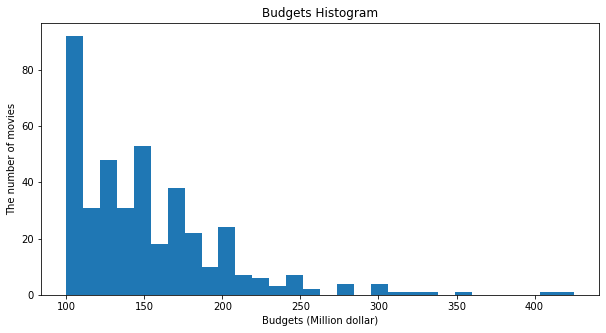

In [20]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.hist(numbers_df['Budgets'], bins = 30)
ax.set_title('Budgets Histogram')
ax.set_xlabel('Budgets (Million dollar)')
ax.set_ylabel('The number of movies')

plt.show()

#### Return on Investment
The return on Investment range is commonly from 0 to 6. The mean is 3 that gets investment returns 3 times as gross income.

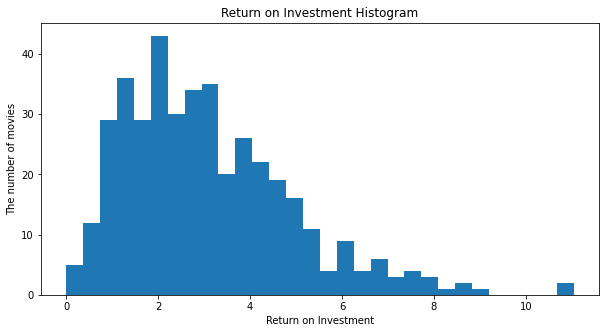

In [23]:
fig2, ax2 = plt.subplots(figsize = (10, 5))
ax2.hist(numbers_df['Return on Investment'].loc[numbers_df['Return on Investment'] < 20], bins = 30)
ax2.set_title('Return on Investment Histogram')
ax2.set_xlabel('Return on Investment')
ax2.set_ylabel('The number of movies')
plt.show()

#### VoteAverage
Vote average is ranged from 4 to 8 mostly. I will check that the movies having most vote average have relationship with return on investment.

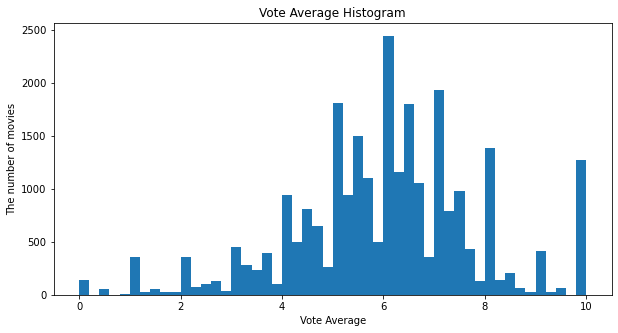

In [24]:
fig3, ax3 = plt.subplots(figsize = (10, 5))
ax3.hist(vote_df['VoteAverage'], bins = 50)
ax3.set_title('Vote Average Histogram')
ax3.set_xlabel('Vote Average')
ax3.set_ylabel('The number of movies')
plt.show()

### Return on Investment from budgets
Budgets and Return on Investment don't have correlation much. However, I can figure out more budgets don't mean more Return on Investment.

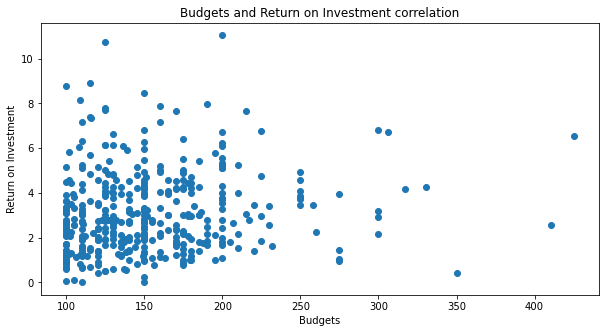

In [26]:
fig, ax4 = plt.subplots(figsize = (10,5))
ax4.scatter(x = numbers_df['Budgets'], y = numbers_df['Return on Investment'])
ax4.set_title('Budgets and Return on Investment correlation')
ax4.set_xlabel('Budgets')
ax4.set_ylabel('Return on Investment')

plt.show()

### Top 10 Total Gross Movies
I picked top 10 movies. The list of Avatar, Titanic, Star Wars Ep VII : The Force Awakens, Avengers : infinity War, Jurassic World, Furious 7, The Avengers, Avengers: Age of Ultron, Black Panther, Harry Potter and the deathly hallows: Part II

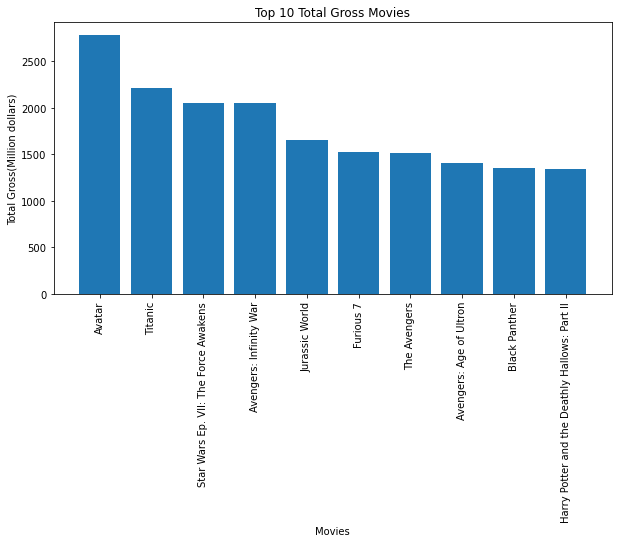

In [48]:
fig, ax5 = plt.subplots(figsize = (10,5))
ax5.bar(x = numbers_df.sort_values('TotalGross', ascending = False)['Movie'].head(10),
       height = numbers_df.sort_values('TotalGross', ascending = False)['TotalGross'].head(10))
ax5.set_title('Top 10 Total Gross Movies')
ax5.set_xlabel('Movies')
ax5.set_ylabel('Total Gross(Million dollars)')
plt.xticks(rotation = 90)
plt.show()

### Top 10 high return on investment movies
I picked top 10 movies of return on investment. The list of Titanic, Harry Potter..., Star Wars..., Harry Potter..., Frozen, The Lord of the Rings..., Furiou 7, Beauty and the Beast, Harry Potter..., Harry Potter...

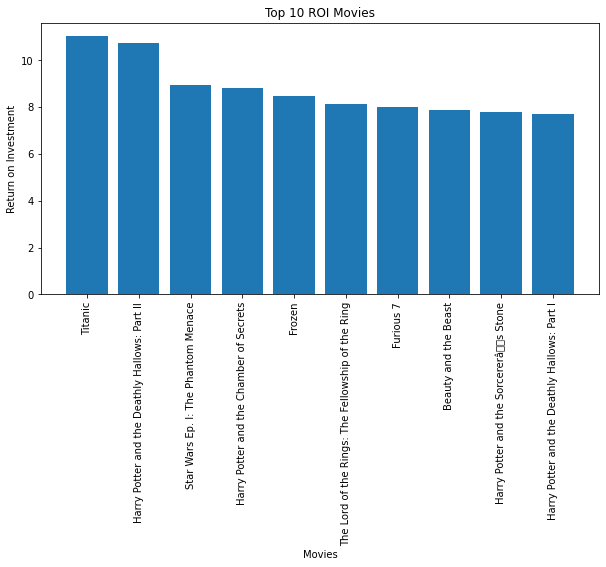

In [50]:
fig, ax6 = plt.subplots(figsize = (10,5))
ax6.bar(x = numbers_df.sort_values('Return on Investment', ascending = False)['Movie'].head(10),
       height = numbers_df.sort_values('Return on Investment', ascending = False)['Return on Investment'].head(10))
ax6.set_title('Top 10 ROI Movies')
ax6.set_xlabel('Movies')
ax6.set_ylabel('Return on Investment')
plt.xticks(rotation = 90)
plt.show()

## Conclusions
This analysis leads to three recommendations for developing movies for best expected profits:

* **Suggestion for choosing movie kinds from top 10 movies selection from the market.** There are top 10 movies from the market choice. Most of the movies are high level CG action and magic movies.
* **Analysis of budgets that most movies spend.**  I suggest to use the budgets from 100 to 200 million dollars, that most movies spent. That's because the budgets don't have correlation with ROI. 
* **Get the goals with vote average.** Most movies have vote average from 5 to 8 rating. If your movie fits in this goal, market tell you 'your movie is successful.'
